In [4]:
import cv2
import sys
sys.path.append('../')
from tools.view import disp_inline_images
import numpy as np

In [14]:
GREEN = ([50, 12, 55],[75, 168, 255])

# GREEN = ([7,15,41 ], [63,86,138])

In [15]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
    # Make a copy of the original image.
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
    (
        img.shape[0],
        img.shape[1],
        3
    ),
    dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
        # Merge the image with the lines onto the original.
        img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
        # Return the modified image.
    return img

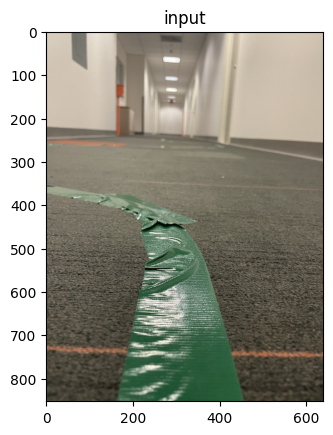

In [16]:
# read images
img_path = '../data/IMG_5633.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
disp_inline_images([img], ['input'])

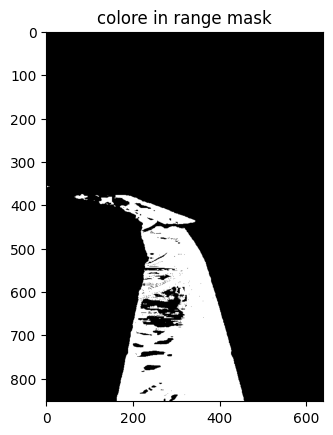

In [17]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_thresh = cv2.inRange(hsv_img, np.array(GREEN[0]), np.array(GREEN[1]))
disp_inline_images([img_thresh], ['colore in range mask'])

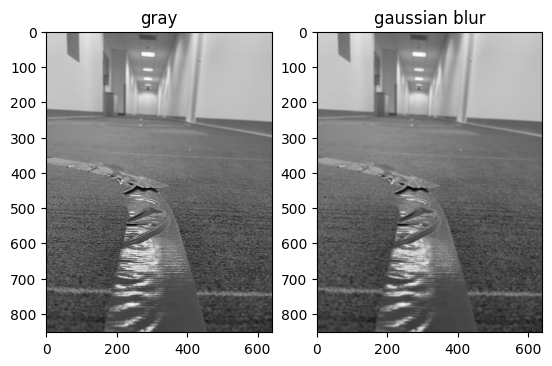

In [18]:
# binarify the image.s 
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (5,5), 0)
disp_inline_images([gray_img, blur_img], ['gray', 'gaussian blur'])

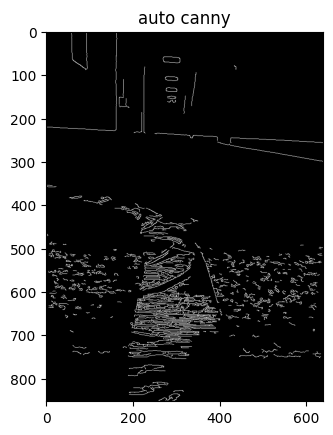

In [19]:
# canny detection
def auto_canny_edge_detection(image, sigma=0.33):
    md = np.median(image)
    lower_value = int(max(0, (1.0-sigma) * md))
    upper_value = int(min(255, (1.0+sigma) * md))
    return cv2.Canny(image, lower_value, upper_value)

edge_img = auto_canny_edge_detection(blur_img)
disp_inline_images([edge_img], ['auto canny'])


##  ~~BIRDEYES~~

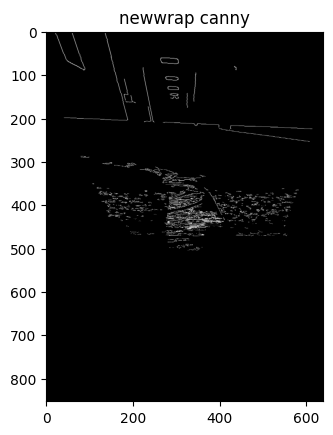

In [20]:
# wrapped image
edge_img.shape
roi_points = np.float32(
    [
        (40, 0),
        (0, 103),
        (593, 103),
        (577, 0),
        
    ]
)
desired_roi_points = np.float32(
    [
        (0,0),
        (0, 103),
        (593, 103),
        (593, 0)
    ]
)
transformation_matrix = cv2.getPerspectiveTransform(
    roi_points, desired_roi_points
)
inv_transformation_matrix = cv2.getPerspectiveTransform(
    desired_roi_points, roi_points)
newwrap = cv2.warpPerspective(edge_img, transformation_matrix, (edge_img.shape[1], edge_img.shape[0]), flags=(cv2.INTER_LINEAR))
disp_inline_images([newwrap], ['newwrap canny'])

## Hough Transform
https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0 

In [21]:
def hough_transform(image):
	"""
	Determine and cut the region of interest in the input image.
	Parameter:
		image: grayscale image which should be an output from the edge detector
	"""
	# Distance resolution of the accumulator in pixels.
	rho = 1			
	# Angle resolution of the accumulator in radians.
	theta = np.pi/180
	# Only lines that are greater than threshold will be returned.
	threshold = 50
	# Line segments shorter than that are rejected.
	minLineLength = 20
	# Maximum allowed gap between points on the same line to link them
	maxLineGap = 1000	
	# function returns an array containing dimensions of straight lines
	# appearing in the input image
	return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
						minLineLength = minLineLength, maxLineGap = maxLineGap)


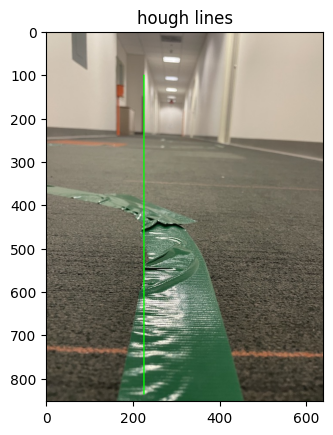

In [22]:
lines = hough_transform(edge_img)
for x1, y1, x2, y2 in lines[0]:
    cv2.line(img, (x1, y1), (x2,y2), (0, 255,0), 2)
disp_inline_images([img], ['hough lines'])

In [23]:
lines.shape

(117, 1, 4)

In [24]:
lines[0]

array([[225, 837, 225, 101]], dtype=int32)

In [25]:
lines[1]

array([[161, 216, 639, 300]], dtype=int32)